# Tutorial FFT: De Señal a Frecuencia

Este notebook te ayudará a entender cómo funciona la Transformada Rápida de Fourier (FFT) paso a paso.

## ¿Qué vamos a hacer?
1. Crear una señal simple (una onda sinusoidal)
2. Aplicar FFT para ver sus frecuencias
3. Aumentar complejidad gradualmente
4. Conectar con el caso de aisladores sísmicos

In [1]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Configurar plots para que se vean bonitos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 4)

## 1. Empecemos con algo MUY simple: Una onda pura

Imagina que tienes un diapasón que vibra a exactamente 440 Hz (la nota LA).

In [3]:
# Parámetros de nuestra señal
fs = 1000  # Frecuencia de muestreo: 1000 muestras por segundo
duracion = 1.0  # Duración: 1 segundo
frecuencia_onda = 440  # Frecuencia de la onda: 440 Hz (nota LA)

# Crear el vector de tiempo
t = np.linspace(0, duracion, int(fs * duracion), endpoint=False)
t.shape

(1000,)

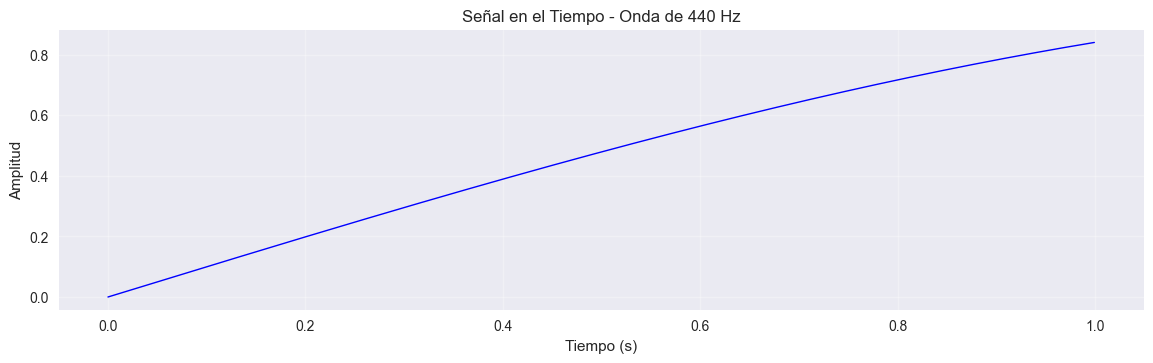

📊 Información de la señal:
- Frecuencia de muestreo: 1000 Hz
- Número de muestras: 1000
- Duración: 1.0 segundos
- Frecuencia de la onda: 440 Hz


In [14]:


# Crear una onda sinusoidal simple
amplitud = 1.0
# señal = amplitud * np.sin(2 * np.pi * frecuencia_onda * t)
señal = np.sin(t)


# Visualizar la señal en el tiempo
plt.figure(figsize=(14, 8))

# Subplot 1: Señal completa
plt.subplot(2, 1, 1)
plt.plot(t, señal, 'b-', linewidth=1)
plt.title(f'Señal en el Tiempo - Onda de {frecuencia_onda} Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True, alpha=0.3)

# # Subplot 2: Zoom a los primeros 10ms para ver mejor la forma de onda
# plt.subplot(2, 1, 2)
# plt.plot(t[:100], señal[:100], 'b-', linewidth=2, marker='o', markersize=4)
# plt.title('Zoom: Primeros 10 milisegundos')
# plt.xlabel('Tiempo (s)')
# plt.ylabel('Amplitud')
# plt.grid(True, alpha=0.3)

# plt.tight_layout()
plt.show()

print(f"📊 Información de la señal:")
print(f"- Frecuencia de muestreo: {fs} Hz")
print(f"- Número de muestras: {len(señal)}")
print(f"- Duración: {duracion} segundos")
print(f"- Frecuencia de la onda: {frecuencia_onda} Hz")

## 2. Aplicar FFT: La magia de ver las frecuencias

Ahora transformaremos nuestra señal del dominio del tiempo al dominio de la frecuencia.

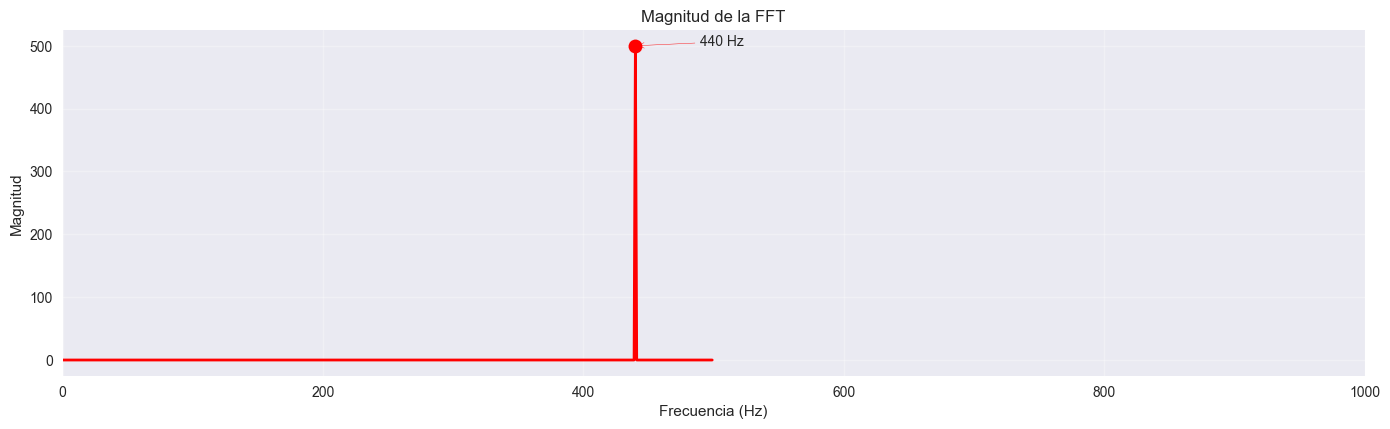

🎯 ¡Mira! La FFT detectó exactamente nuestra frecuencia de 440 Hz
   El pico está en: 440.0 Hz


In [6]:
# Aplicar FFT
señal_fft = fft(señal)
frecuencias = fftfreq(len(señal), 1/fs)

# FFT devuelve valores complejos, necesitamos el módulo (magnitud)
magnitud_fft = np.abs(señal_fft)

# Solo queremos frecuencias positivas (la FFT es simétrica)
mask_positiva = frecuencias >= 0
frecuencias_pos = frecuencias[mask_positiva]
magnitud_pos = magnitud_fft[mask_positiva]

# Calcular PSD (Power Spectral Density)
psd = magnitud_pos**2

# Visualizar
plt.figure(figsize=(14, 8))

# Subplot 1: Magnitud de FFT
plt.subplot(2, 1, 1)
plt.plot(frecuencias_pos, magnitud_pos, 'r-', linewidth=2)
plt.title('Magnitud de la FFT')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, 1000)
plt.grid(True, alpha=0.3)

# Marcar el pico
idx_pico = np.argmax(magnitud_pos)
plt.plot(frecuencias_pos[idx_pico], magnitud_pos[idx_pico], 'ro', markersize=10)
plt.annotate(f'{frecuencias_pos[idx_pico]:.0f} Hz', 
             xy=(frecuencias_pos[idx_pico], magnitud_pos[idx_pico]),
             xytext=(frecuencias_pos[idx_pico]+50, magnitud_pos[idx_pico]),
             arrowprops=dict(arrowstyle='->', color='red'))

## Subplot 2: PSD (Densidad Espectral de Potencia)
# plt.subplot(2, 1, 2)
# plt.semilogy(frecuencias_pos, psd, 'g-', linewidth=2)
# plt.title('Densidad Espectral de Potencia (PSD)')
# plt.xlabel('Frecuencia (Hz)')
# plt.ylabel('Potencia')
# plt.xlim(0, 1000)
# plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"🎯 ¡Mira! La FFT detectó exactamente nuestra frecuencia de {frecuencia_onda} Hz")
print(f"   El pico está en: {frecuencias_pos[idx_pico]:.1f} Hz")

## 3. Hagámoslo más interesante: Múltiples frecuencias

En la vida real, las señales no son ondas puras. Vamos a mezclar varias frecuencias.

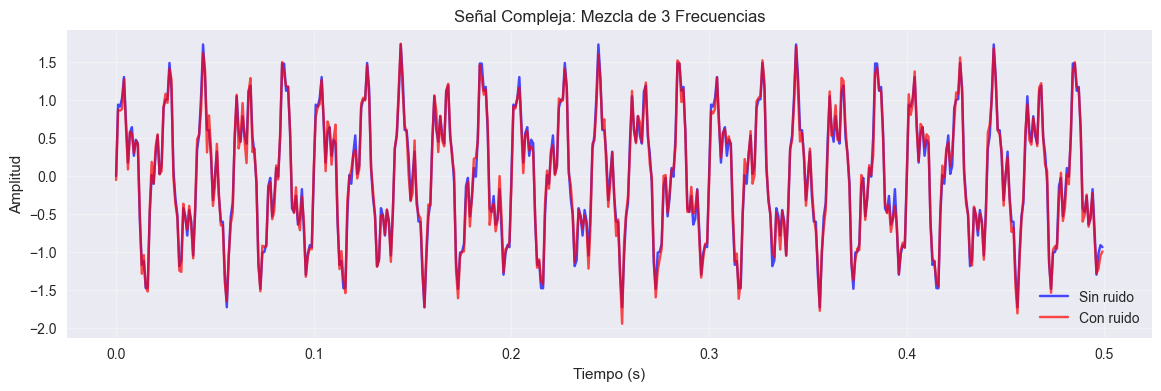

In [7]:
# Crear una señal con múltiples componentes de frecuencia
frecuencia1 = 50   # Hz - Frecuencia baja
frecuencia2 = 120  # Hz - Frecuencia media
frecuencia3 = 300  # Hz - Frecuencia alta

# Diferentes amplitudes para cada componente
amp1 = 1.0
amp2 = 0.5
amp3 = 0.3

# Crear la señal compuesta
señal_compleja = (amp1 * np.sin(2 * np.pi * frecuencia1 * t) +
                  amp2 * np.sin(2 * np.pi * frecuencia2 * t) + 
                  amp3 * np.sin(2 * np.pi * frecuencia3 * t))

# Agregar un poco de ruido para hacerlo más realista
ruido = 0.1 * np.random.normal(0, 1, len(t))
señal_compleja_ruidosa = señal_compleja + ruido

# Visualizar señal en el tiempo
plt.figure(figsize=(14, 4))
plt.plot(t[:500], señal_compleja[:500], 'b-', alpha=0.7, label='Sin ruido')
plt.plot(t[:500], señal_compleja_ruidosa[:500], 'r-', alpha=0.7, label='Con ruido')
plt.title('Señal Compleja: Mezcla de 3 Frecuencias')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

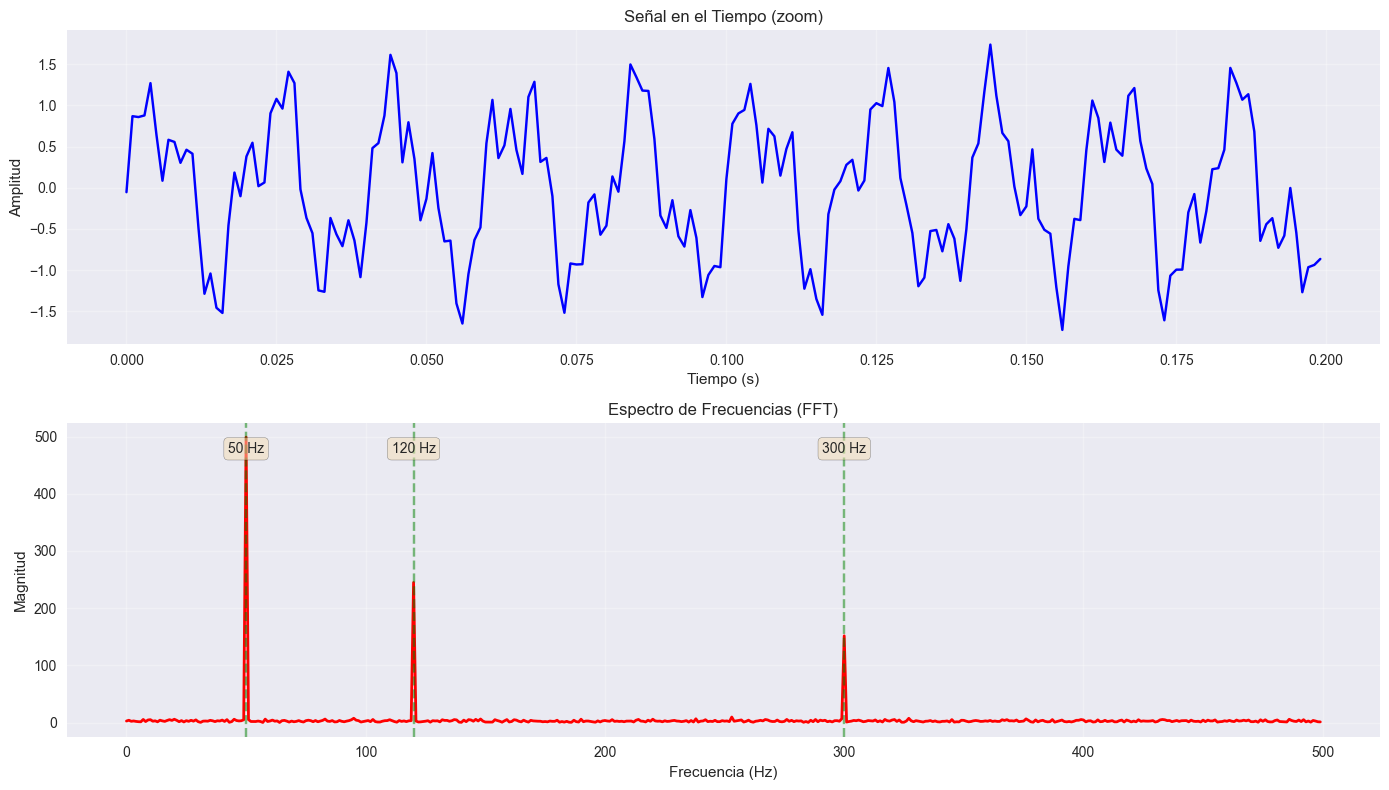

🎯 La FFT detectó todas nuestras frecuencias:
   - 50 Hz (amplitud 1.0)
   - 120 Hz (amplitud 0.5)
   - 300 Hz (amplitud 0.3)
   + ruido en todas las frecuencias


In [8]:
# Aplicar FFT a la señal compleja
fft_compleja = fft(señal_compleja_ruidosa)
mag_compleja = np.abs(fft_compleja)
psd_compleja = mag_compleja**2

# Solo frecuencias positivas
mag_compleja_pos = mag_compleja[mask_positiva]
psd_compleja_pos = psd_compleja[mask_positiva]

# Visualización comparativa
plt.figure(figsize=(14, 8))

# Subplot 1: Señal en el tiempo
plt.subplot(2, 1, 1)
plt.plot(t[:200], señal_compleja_ruidosa[:200], 'b-')
plt.title('Señal en el Tiempo (zoom)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True, alpha=0.3)

# Subplot 2: Espectro de frecuencias
plt.subplot(2, 1, 2)
plt.plot(frecuencias_pos[:500], mag_compleja_pos[:500], 'r-', linewidth=2)
plt.title('Espectro de Frecuencias (FFT)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True, alpha=0.3)

# Marcar las frecuencias esperadas
for f, amp in [(frecuencia1, amp1), (frecuencia2, amp2), (frecuencia3, amp3)]:
    plt.axvline(x=f, color='g', linestyle='--', alpha=0.5)
    plt.text(f, plt.ylim()[1]*0.9, f'{f} Hz', ha='center', 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("🎯 La FFT detectó todas nuestras frecuencias:")
print(f"   - {frecuencia1} Hz (amplitud {amp1})")
print(f"   - {frecuencia2} Hz (amplitud {amp2})")
print(f"   - {frecuencia3} Hz (amplitud {amp3})")
print("   + ruido en todas las frecuencias")

## 4. Conexión con Aisladores Sísmicos: Señal Real

Ahora simulemos algo más parecido a lo que verías en un aislador sísmico.

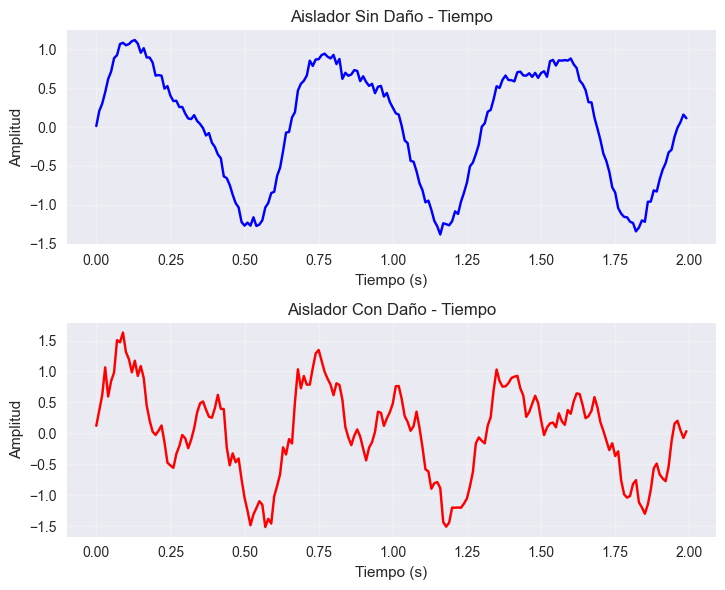

In [9]:
# Simular vibración de un aislador sísmico
# Los aisladores típicamente tienen frecuencias naturales bajas (0.5-5 Hz)

# Parámetros más realistas
fs_real = 100  # 100 Hz como en tu dataset
duracion_real = 10  # 10 segundos
t_real = np.linspace(0, duracion_real, int(fs_real * duracion_real), endpoint=False)

# Frecuencias típicas de un aislador
freq_natural = 1.5   # Hz - Frecuencia natural del aislador
freq_edificio = 3.2  # Hz - Modo del edificio
freq_ruido_alta = 15 # Hz - Ruido de alta frecuencia

# Simular diferentes condiciones de daño
# Sin daño: respuesta limpia
aislador_sin_daño = (1.0 * np.sin(2 * np.pi * freq_natural * t_real) +
                     0.3 * np.sin(2 * np.pi * freq_edificio * t_real) +
                     0.05 * np.random.normal(0, 1, len(t_real)))

# Con daño: aparecen armónicos y cambian amplitudes
aislador_con_daño = (0.7 * np.sin(2 * np.pi * freq_natural * t_real) +      # Amplitud reducida
                     0.4 * np.sin(2 * np.pi * freq_natural * 2 * t_real) +  # Armónico 2x
                     0.5 * np.sin(2 * np.pi * freq_edificio * t_real) +     # Más acoplamiento
                     0.2 * np.sin(2 * np.pi * freq_ruido_alta * t_real) +   # Más ruido alta freq
                     0.1 * np.random.normal(0, 1, len(t_real)))

# Comparar visualmente
plt.figure(figsize=(14, 6))

# Señales en el tiempo
plt.subplot(2, 2, 1)
plt.plot(t_real[:200], aislador_sin_daño[:200], 'b-')
plt.title('Aislador Sin Daño - Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(t_real[:200], aislador_con_daño[:200], 'r-')
plt.title('Aislador Con Daño - Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

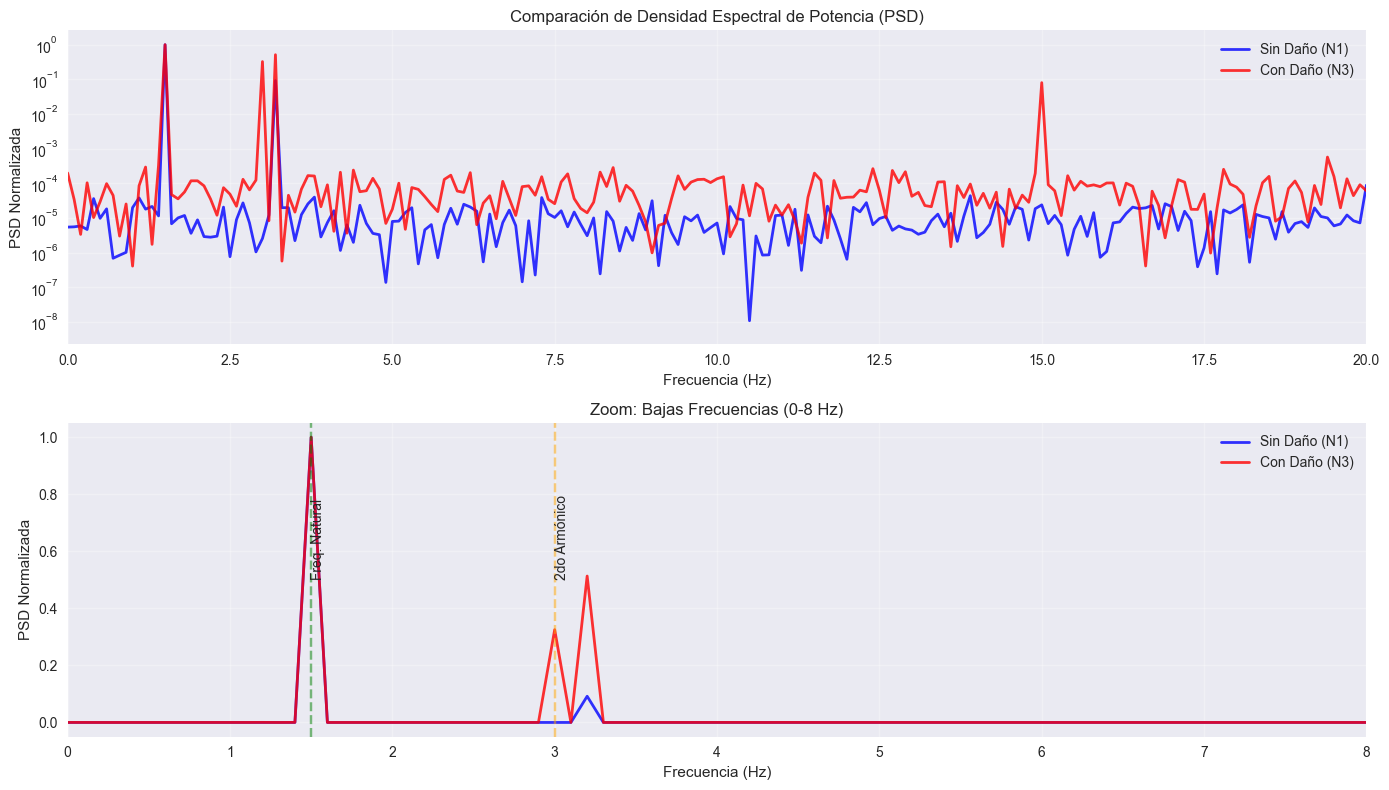

🔍 Observaciones clave:
1. El aislador sin daño tiene un pico limpio en su frecuencia natural (1.5 Hz)
2. El aislador con daño muestra:
   - Aparición de armónicos (3 Hz = 2×1.5 Hz)
   - Cambio en las amplitudes relativas
   - Mayor contenido de alta frecuencia (ruido)

🎯 Esto es lo que tu modelo DCNN intenta detectar!


In [ ]:
# FFT de ambas señales
def calcular_y_plotear_fft(señal, fs, titulo, color):
    # FFT
    fft_señal = fft(señal)
    freqs = fftfreq(len(señal), 1/fs)
    
    # Solo positivas
    mask = freqs >= 0
    freqs_pos = freqs[mask]
    mag_pos = np.abs(fft_señal[mask])
    psd_pos = mag_pos**2
    
    # Normalizar PSD para comparación
    psd_norm = psd_pos / np.max(psd_pos)
    
    return freqs_pos, psd_norm

# Calcular FFTs
freqs1, psd1 = calcular_y_plotear_fft(aislador_sin_daño, fs_real, 'Sin Daño', 'b')
freqs2, psd2 = calcular_y_plotear_fft(aislador_con_daño, fs_real, 'Con Daño', 'r')

# Comparación de espectros
plt.figure(figsize=(14, 8))

# PSD comparativo
plt.subplot(2, 1, 1)
plt.semilogy(freqs1[:1000], psd1[:1000], 'b-', linewidth=2, label='Sin Daño (N1)', alpha=0.8)
plt.semilogy(freqs2[:1000], psd2[:1000], 'r-', linewidth=2, label='Con Daño (N3)', alpha=0.8)
plt.title('Comparación de Densidad Espectral de Potencia (PSD)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD Normalizada')
plt.xlim(0, 20)
plt.legend()
plt.grid(True, alpha=0.3)

# Zoom en bajas frecuencias (más relevante para aisladores)
plt.subplot(2, 1, 2)
plt.plot(freqs1[:400], psd1[:400], 'b-', linewidth=2, label='Sin Daño (N1)', alpha=0.8)
plt.plot(freqs2[:400], psd2[:400], 'r-', linewidth=2, label='Con Daño (N3)', alpha=0.8)
plt.title('Zoom: Bajas Frecuencias (0-8 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD Normalizada')
plt.xlim(0, 8)
plt.legend()
plt.grid(True, alpha=0.3)

# Marcar frecuencias importantes
plt.axvline(x=freq_natural, color='g', linestyle='--', alpha=0.5)
plt.text(freq_natural, 0.5, 'Freq. Natural', rotation=90, va='bottom')
plt.axvline(x=freq_natural*2, color='orange', linestyle='--', alpha=0.5)
plt.text(freq_natural*2, 0.5, '2do Armónico', rotation=90, va='bottom')

plt.tight_layout()
plt.show()

print("🔍 Observaciones clave:")
print("1. El aislador sin daño tiene un pico limpio en su frecuencia natural (1.5 Hz)")
print("2. El aislador con daño muestra:")
print("   - Aparición de armónicos (3 Hz = 2×1.5 Hz)")
print("   - Cambio en las amplitudes relativas")
print("   - Mayor contenido de alta frecuencia (ruido)")
print("\n🎯 Esto es lo que tu modelo DCNN intenta detectar!")

## 5. El Problema de las Dimensiones en FFT

Veamos por qué FFT "explota" las dimensiones en los Experimentos 2 y 3.

📊 Análisis de dimensiones en tu dataset:

1. SEÑAL TEMPORAL:
   - Duración: 30 minutos
   - Frecuencia muestreo: 100 Hz
   - Muestras totales: 180,000 por componente
   - Componentes: 3 (N-S, E-W, U-D)
   - Total valores: 540,000

2. DESPUÉS DE FFT:
   - Bins de frecuencia: 90,000 por componente
   - Total características: 270,000
   - Resolución frecuencial: 0.0006 Hz/bin

3. PROBLEMA EN EXP2/EXP3:
   - Cada bin se trata como 'observación' independiente
   - Un dispositivo genera 90,000 'observaciones'
   - ¡Pero todos vienen del MISMO aislador físico!

4. SOLUCIÓN EN EXP4:
   - Características agregadas: ~150 totales
   - Una observación = Un dispositivo
   - Sin pseudo-replicación ✅


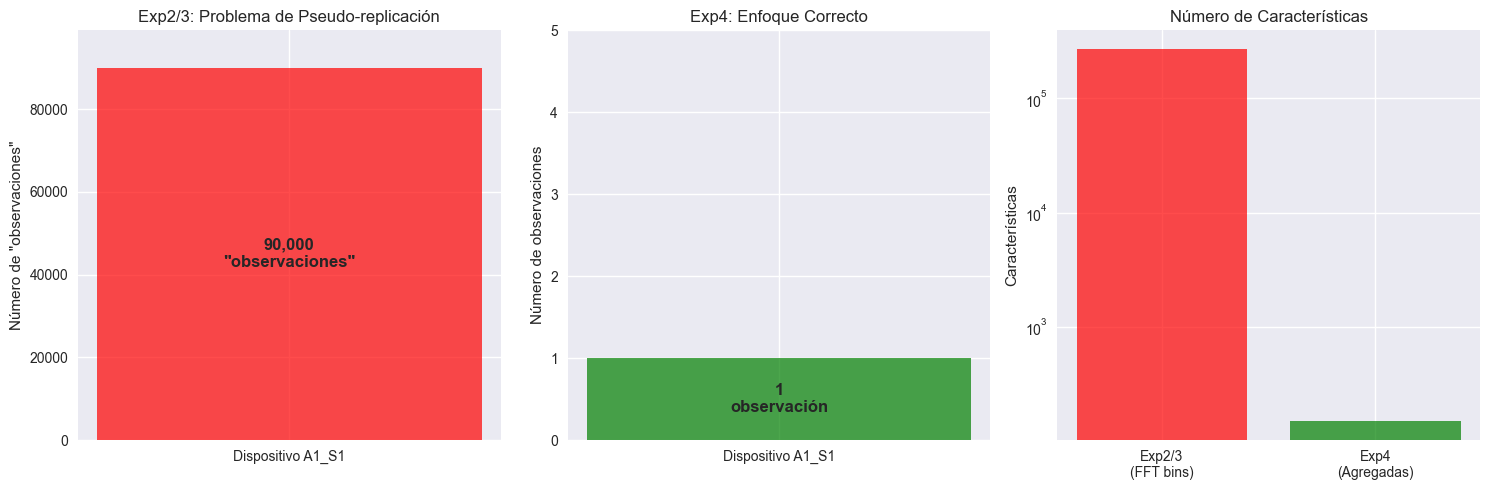

In [11]:
# Simulemos el caso real de tu dataset
duracion_tipica = 30 * 60  # 30 minutos
fs_dataset = 100  # Hz
n_muestras = int(duracion_tipica * fs_dataset)
n_componentes = 3  # N-S, E-W, U-D

print("📊 Análisis de dimensiones en tu dataset:")
print(f"\n1. SEÑAL TEMPORAL:")
print(f"   - Duración: {duracion_tipica/60:.0f} minutos")
print(f"   - Frecuencia muestreo: {fs_dataset} Hz")
print(f"   - Muestras totales: {n_muestras:,} por componente")
print(f"   - Componentes: {n_componentes} (N-S, E-W, U-D)")
print(f"   - Total valores: {n_muestras * n_componentes:,}")

print(f"\n2. DESPUÉS DE FFT:")
n_freq_bins = n_muestras // 2  # Solo frecuencias positivas
print(f"   - Bins de frecuencia: {n_freq_bins:,} por componente")
print(f"   - Total características: {n_freq_bins * n_componentes:,}")
print(f"   - Resolución frecuencial: {fs_dataset/n_muestras:.4f} Hz/bin")

print(f"\n3. PROBLEMA EN EXP2/EXP3:")
print(f"   - Cada bin se trata como 'observación' independiente")
print(f"   - Un dispositivo genera {n_freq_bins:,} 'observaciones'")
print(f"   - ¡Pero todos vienen del MISMO aislador físico!")

print(f"\n4. SOLUCIÓN EN EXP4:")
n_stats = 50  # Aproximado de estadísticos por componente
print(f"   - Características agregadas: ~{n_stats * n_componentes} totales")
print(f"   - Una observación = Un dispositivo")
print(f"   - Sin pseudo-replicación ✅")

# Visualización del problema
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Exp2/3: Muchas "observaciones" del mismo dispositivo
ax1.bar(['Dispositivo A1_S1'], [n_freq_bins], color='red', alpha=0.7)
ax1.set_title('Exp2/3: Problema de Pseudo-replicación')
ax1.set_ylabel('Número de "observaciones"')
ax1.set_ylim(0, n_freq_bins * 1.1)
ax1.text(0, n_freq_bins/2, f'{n_freq_bins:,}\n"observaciones"', 
         ha='center', va='center', fontsize=12, weight='bold')

# Exp4: Una observación por dispositivo
ax2.bar(['Dispositivo A1_S1'], [1], color='green', alpha=0.7)
ax2.set_title('Exp4: Enfoque Correcto')
ax2.set_ylabel('Número de observaciones')
ax2.set_ylim(0, 5)
ax2.text(0, 0.5, '1\nobservación', ha='center', va='center', 
         fontsize=12, weight='bold')

# Comparación de características
ax3.bar(['Exp2/3\n(FFT bins)', 'Exp4\n(Agregadas)'], 
        [n_freq_bins * n_componentes, n_stats * n_componentes],
        color=['red', 'green'], alpha=0.7)
ax3.set_title('Número de Características')
ax3.set_ylabel('Características')
ax3.set_yscale('log')

plt.tight_layout()
plt.show()

## 6. Resumen y Conclusiones

### ¿Qué aprendimos?

1. **FFT transforma tiempo → frecuencia**
   - Revela qué frecuencias están presentes en la señal
   - PSD nos dice qué tan fuerte es cada frecuencia

2. **En aisladores sísmicos:**
   - Frecuencias bajas (0.5-5 Hz) son las más importantes
   - El daño cambia el patrón de frecuencias
   - Aparecen armónicos y cambios en amplitudes

3. **El problema dimensional:**
   - FFT genera MUCHOS bins de frecuencia
   - Tratarlos como observaciones independientes es incorrecto
   - Exp4 lo resuelve agregando características

### Próximos pasos:
- Cargar una señal real de tu dataset
- Aplicar estos conceptos a datos reales
- Visualizar diferencias entre N1, N2 y N3